# Table of Contents
 <p><div class="lev2"><a href="#参考文献"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>参考文献</a></div>

1変数の確率微分方程式は一般に次の形で表されます。

$$
dX(t) = f(X(t))dt+g(X(t))dW(t),\ \   X(0)=X_0, 0\leq t \leq T
$$

ここで$f,g$はスカラー関数、$W(t)$はWienerプロセスです。この方程式の数値計算をしてみます。

数値計算をするためには、離散化をする必要があります。確率微分方程式の離散化には大きく2つの方法があり、それぞれEuler-Maruyama法とMilstein法と呼ばれています。今回は、精度は劣るものの、簡単であるEuler-Maruyama法を用いて計算します。

まず、区間$[0,T]$を離散化します。じゅうぶん大きな正の整数$N$を用いて、$\Delta t := T/N$、$\tau_j := j \Delta t$とします。また、$X_j:=X(\tau_j)$と表すことにします。

Euler-Maruyama法では次の形式によって方程式を離散化します。

$$X_j = X_{j-1}+f(X_{j-1})\Delta t + g(X_{j-1}) (W(\tau_j)-W(\tau_{j-1})), j=1,2,\cdots L$$

ここで、$W(t)$はWienerプロセスであることから、$W(\tau_j)-W(\tau_{j-1})$は平均0、分散$\tau_j-\tau_{j-1}$の正規分布$N(0, \tau_j - \tau_{j-1})$に従う確率変数です。

Euler-Maruyama法を使って、下式で表される幾何ブラウン運動を計算してみます。
$$
dX(t) = \sigma X(t) dt +  \mu X(t) dW(t), \ \ X(0)=X_0
$$
ここで$\sigma, \mu$は定数です。幾何ブラウン運動は解析解を求めることができ、解は次の通りです。
$$
X(t) = X(0) \exp\{(\sigma-\frac{1}{2}\mu^2)t+\mu W(t)\}
$$

Eular-Maruyama法の結果と解析解の結果を比較するコードは以下の通りです。

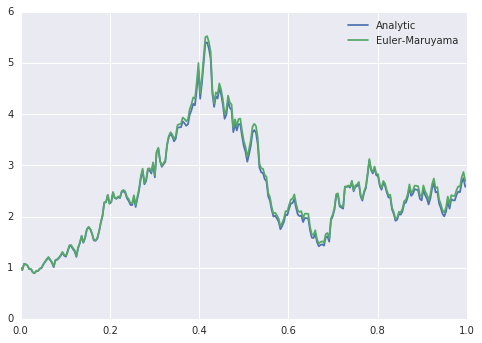

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sigma = 2
mu = 1
Xzero = 1

T = 1.0
N = 2**8
dt = T / N

t = np.arange(0.0, T, dt)
dW = np.sqrt(dt) *  np.random.randn(N)
dW[0] = 0
W = np.cumsum(dW)
Xtrue = Xzero * np.exp(  (sigma - 0.5 * mu**2) * t +(mu*W)  )

Xem = np.zeros(N)
Xtemp = Xzero
Xem[0] = Xtemp
for j in range(1, N):
    Xtemp = Xtemp + dt * sigma * Xtemp + mu * Xtemp * dW[j]
    Xem[j] = Xtemp 

plt.plot(t, Xtrue, label='Analytic')
plt.plot(t, Xem, label='Euler-Maruyama')
plt.legend()

## 参考文献
* [Learning SDEs in Python](https://www.quantopian.com/posts/learning-sdes-in-python)
